# Sinaloa Overview

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/able_to_work.csv')
del df["Unnamed: 0"]

C:\Users\Diego\AppData\Local\Temp\ipykernel_13368\814018774.py:1: DtypeWarning: Columns (5,7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/able_to_work.csv')


In [3]:
for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

In [4]:
sinaloa = df[df["estado"] == "sinaloa"].copy()
sinaloa.head()

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,tipo_de_cejas,tamano_de_la_boca,barba,bigote,submarca,tipo_denuncia,tipo_de_evento,tipo_causal,clasificacion_causal,causal
411,desaparecido,2010-05-21 12:00:00,2010-05-21 04:00:00,sinaloa,25,guasave,11,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
421,desaparecido,2010-01-15 12:00:00,2010-01-14 07:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
422,desaparecido,2010-01-26 12:00:00,2010-01-21 08:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
425,desaparecido,2010-03-30 12:00:00,2010-03-29 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
426,desaparecido,2010-05-17 12:00:00,2010-05-15 05:30:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_


In [5]:
sinaloa['year_reporte'] = sinaloa['fecha_reporte'].dt.year
sinaloa["dias_de_busqueda_reporte"] = sinaloa["fecha_de_localizacion"] - sinaloa["fecha_reporte"]
sinaloa["dias_de_busqueda_evento"] = sinaloa["fecha_de_localizacion"] - sinaloa["fecha_evento"]
sinaloa[["year_reporte", "dias_de_busqueda_reporte","dias_de_busqueda_evento"]].head()
sinaloa.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True)

In [6]:
len(sinaloa)

7798

In [7]:
sinaloa.sexo.value_counts()

masculino    5669
femenino     2129
Name: sexo, dtype: int64

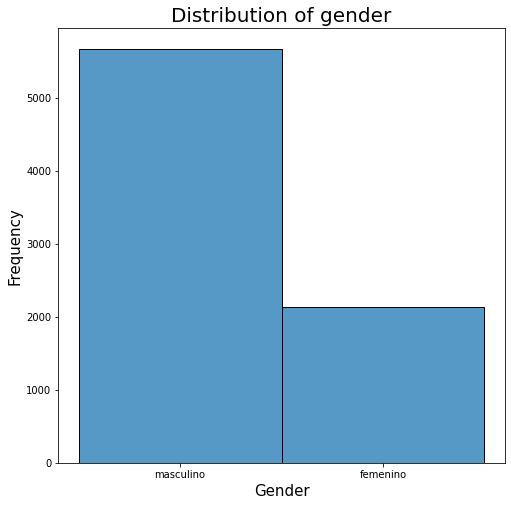

In [8]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Gender',fontdict=font2)
plt.title('Distribution of gender', fontdict=font1)

sns.histplot(sinaloa.sexo)
plt.show()

## Encontrados vivos vs encontrados muertos

In [9]:
sinaloa.vivo_o_muerto.value_counts()

vivo                 3912
aun_sin_localizar    3031
muerto                855
Name: vivo_o_muerto, dtype: int64

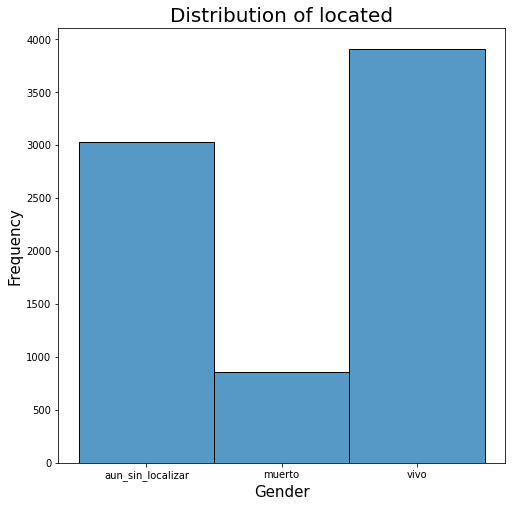

In [10]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Gender',fontdict=font2)
plt.title('Distribution of located', fontdict=font1)

sns.histplot(sinaloa.vivo_o_muerto)
plt.show()

In [11]:
sinaloa[(sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 1673
aun_sin_localizar     394
muerto                 62
Name: vivo_o_muerto, dtype: int64

In [12]:
sinaloa[(sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    2637
vivo                 2239
muerto                793
Name: vivo_o_muerto, dtype: int64

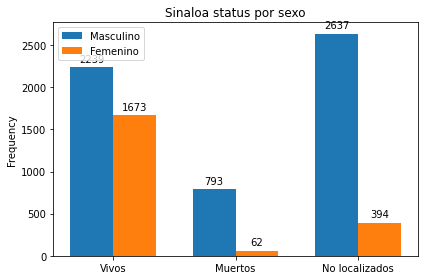

In [13]:
labels = ["Vivos", "Muertos", "No localizados"]
men_means = [2239, 793, 2637]
women_means = [1673, 62,394]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Sinaloa status por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
sinaloa[(sinaloa["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                                                                                                                                                                                                                                 481
forzosa                                                                                                                                                                                                                                                                                                                         189
-1                                                                                                                                                                                                                                                                                                                               73
privacion_de_la_libertad    

In [15]:
sinaloa[(sinaloa["sexo"] == "femenino")].posible_causa_desaparicion.value_counts().head(20)

no_especificado                          481
forzosa                                  189
-1                                        73
privacion_de_la_libertad                  47
se_fue_con_el_novio                       36
se_fue_por_voluntad_propia                33
homicidio_doloso                          22
se_fue_con_una_amiga                      19
privacion_de_la_libertad_personal         11
desconocido                               10
se_desconoce                               7
ausencia                                   7
lo_privaron_a_fuerza_de_su_libertad        7
se_fue_a_vivir_con_el_novio                7
se_fue_por_su_propia_voluntad              6
desconocida                                6
se_fue_con_un_amigo                        5
privacion_forzosa                          4
se_fue_con_unas_amigas                     3
se_fue_de_la_casa_por_voluntad_propia      3
Name: posible_causa_desaparicion, dtype: int64

In [16]:
sinaloa[(sinaloa["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

no_especificado                                                                             564
forzosa                                                                                     419
homicidio_doloso                                                                            278
-1                                                                                          173
privacion_de_la_libertad                                                                    116
                                                                                           ... 
se_fue_a_visitar_a_una_hija_a_sonora                                                          1
privado_de_la_libertad_de_manera_forzosa                                                      1
no_supo_el_motivo_por_el_cual_fue_privado_de_su_libertad                                      1
?lo_encontraron_por_dicha_?carretera_a_bordo_de_la_camioneta_en_que_había_salido_de_casa      1
fue_sustraido_por_la_madre              

In [17]:
sinaloa[(sinaloa["sexo"] == "masculino")].posible_causa_desaparicion.value_counts().head(20)

no_especificado                                                                                     564
forzosa                                                                                             419
homicidio_doloso                                                                                    278
-1                                                                                                  173
privacion_de_la_libertad                                                                            116
desconocido                                                                                          53
desconocida                                                                                          47
se_desconoce                                                                                         41
privacion_de_la_libertad_personal                                                                    35
se_fue_por_voluntad_propia                                      

## Bebés desaparecidos en Sinaloa ?

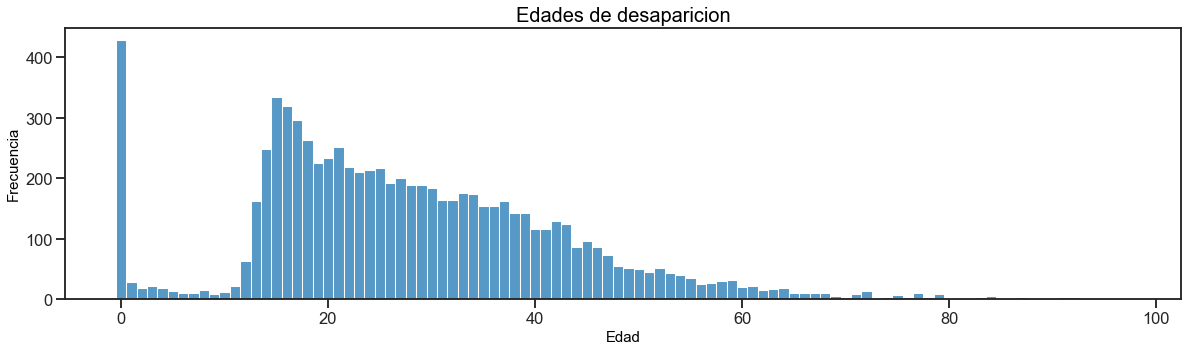

In [18]:
plt.figure(figsize=(20, 5))

sns.color_palette("rocket", as_cmap=True)
sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(sinaloa.edad,discrete='True')

plt.title('Edades de desaparicion',fontdict=font1)
plt.xlabel('Edad',fontdict=font2)
plt.ylabel('Frecuencia',fontdict=font2)

plt.show()

In [19]:
sinaloa.edad.value_counts().head(6)

0.0     428
15.0    335
16.0    320
17.0    296
18.0    264
21.0    252
Name: edad, dtype: int64

<BarContainer object of 6 artists>

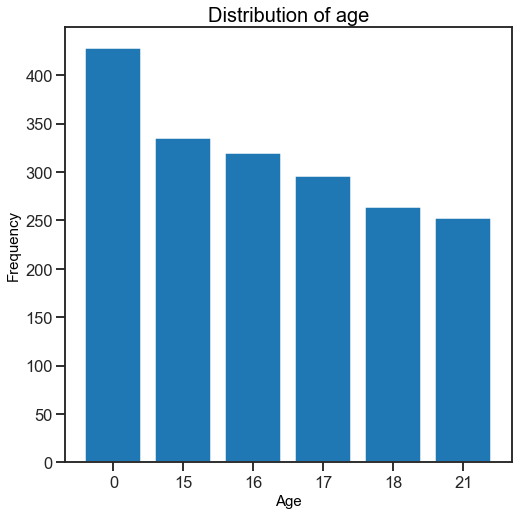

In [20]:
labels = ["0", "15", "16", "17", "18", "21"]
values = [428, 335, 320, 296, 264, 252]

plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Age',fontdict=font2)
plt.title('Distribution of age', fontdict=font1)

plt.bar(labels,values)

están desapareciendo bebés de 0 años ? o es algún fallo humano en la captura de los datos ?  la proporción es alrdedor de 5.48% del total, es decir, 5.48% de desaparecidos en Sinaloa parecen ser bebés menores al año de edad

In [21]:
sinaloa.fecha_de_nacimiento.value_counts().head()

01/01/00_0:00    712
01/01/95_0:00    347
_                346
01/01/96_0:00    299
01/01/94_0:00    218
Name: fecha_de_nacimiento, dtype: int64

de nuevo hay muchos datos en fecha de nacimiento marcados con el año 1900... además hay 346 desaparecidos que no se tiene fecha de nacimiento, tendrán algo que ver con los de edad 0 ?

In [22]:
sinaloa[(sinaloa["edad"] == 0.0 ) & (sinaloa["fecha_de_nacimiento"] == "_")]

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,bigote,submarca,tipo_denuncia,tipo_de_evento,tipo_causal,clasificacion_causal,causal,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento
426,desaparecido,2010-05-17 12:00:00,2010-05-15 05:30:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,NaT,NaT
439,desaparecido,2010-06-22 12:00:00,2010-04-13 01:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,NaT,NaT
458,desaparecido,2010-09-20 12:00:00,2010-09-08 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,NaT,NaT
640,desaparecido,2010-12-01 12:00:00,2010-12-01 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,NaT,NaT
654,desaparecido,2010-04-13 12:00:00,2010-02-20 11:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42716,desaparecido,2008-10-05 12:00:00,2008-10-05 12:00:00,sinaloa,NaN,culiacan,NaN,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2008,NaT,NaT
42722,desaparecido,2008-10-21 12:00:00,2008-10-17 02:00:00,sinaloa,NaN,culiacan,NaN,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2008,NaT,NaT
42766,desaparecido,2009-09-13 12:00:00,2009-09-13 07:00:00,sinaloa,NaN,elota,NaN,mexicana,no_especificado,femenino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2009,NaT,NaT
42769,desaparecido,2009-03-01 12:00:00,2008-12-17 02:00:00,sinaloa,NaN,mazatlan,NaN,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2009,NaT,NaT


de los 428 con edad 0 hay 155 que concuerdan con edad "_" vamos a ver cuantos hay con edad 1900

In [23]:
sinaloa[(sinaloa["edad"] == 0.0 ) & (sinaloa["fecha_de_nacimiento"] == "01/01/00_0:00")]

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,bigote,submarca,tipo_denuncia,tipo_de_evento,tipo_causal,clasificacion_causal,causal,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento
446,desaparecido,2010-07-24 12:00:00,2010-07-24 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,-1 days +15:00:00,-1 days +15:00:00
452,desaparecido,2010-08-24 12:00:00,2010-08-23 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,-1 days +19:10:00,0 days 19:10:00
453,desaparecido,2010-10-09 12:00:00,2010-10-09 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,-17 days +15:00:00,-17 days +15:00:00
459,desaparecido,2010-10-30 12:00:00,2010-03-07 03:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,919 days 17:00:00,1157 days 02:00:00
477,desaparecido,2010-09-11 02:30:00,2010-09-11 12:00:00,sinaloa,25,culiacan,6,mexicana,no_especificado,masculino,...,NaN,no_especificado,NaN,eventos_validados,_,_,_,2010,0 days 00:00:00,-1 days +14:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45721,desaparecido,2012-11-23 11:44:00,2011-12-16 12:00:00,sinaloa,NaN,mazatlan,NaN,mexicana,NaN,femenino,...,NaN,NaN,NaN,eventos_validados,_,_,_,2012,NaT,NaT
45731,desaparecido,2013-07-03 05:09:00,2012-11-30 08:00:00,sinaloa,NaN,culiacan,NaN,mexicana,NaN,masculino,...,NaN,NaN,NaN,eventos_validados,_,_,_,2013,NaT,NaT
45752,desaparecido,2013-02-20 12:10:00,2012-01-05 10:00:00,sinaloa,NaN,mazatlan,NaN,mexicana,NaN,masculino,...,NaN,NaN,NaN,eventos_validados,_,_,_,2013,NaT,NaT
45806,desaparecido,2012-04-07 09:20:00,2012-02-07 01:30:00,sinaloa,NaN,navolato,NaN,mexicana,NaN,masculino,...,NaN,NaN,NaN,eventos_validados,_,_,_,2012,NaT,NaT


hay 261 que concuerdan con esos fallos humanos en la captura, 155 + 261 = 416, no sé si son errores humanos o no, no se me ocurre nada con que compararlo...

Siento escalofríos, al buscar "bebés desaparecidos en Sinaloa" aparecen muchos casos de alertas amber, tanto recientes como antiguas, además de notas en periodicos locales donde hay consejos de parte de colectivos para la busqueda de menores, mencionan que la situación de desaparecidos es alarmante en menores de edad, sobre todo en bebés y en mujeres de 15 años, por que no hay mención de los casos de hombres ? si los datos me dicen que son casi el doble...   

Vamos a observar si los desaparecidos de 0 años son encontrados vivos, muertos o no localizados....

En estas noticias de colectivos, mencionan que las muejeres de 15 años son las que más desaparecen ya que "se las roba el novio" vamos a ver que nos dicen los datos, procedo a explorar los casos de 15 años

In [24]:
sinaloa[(sinaloa["edad"] == 0.0 )].vivo_o_muerto.value_counts()

aun_sin_localizar    214
vivo                 183
muerto                31
Name: vivo_o_muerto, dtype: int64

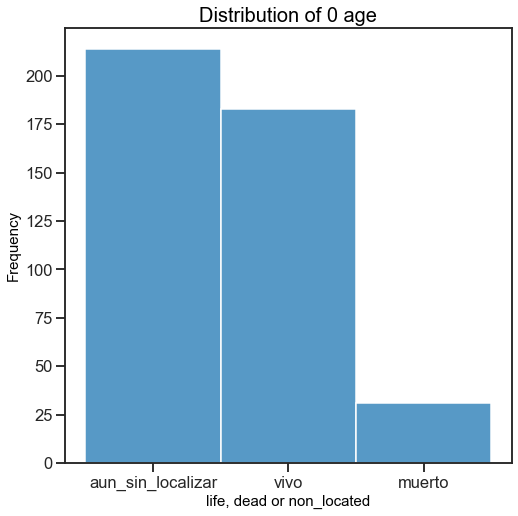

In [25]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('life, dead or non_located',fontdict=font2)
plt.title('Distribution of 0 age', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 0.0 )].vivo_o_muerto)
plt.show()

In [26]:
sinaloa[(sinaloa["edad"] == 0.0 )].sexo.value_counts()

masculino    360
femenino      68
Name: sexo, dtype: int64

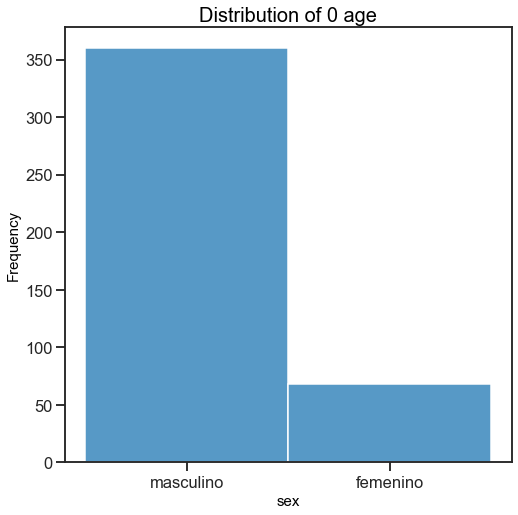

In [27]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('sex',fontdict=font2)
plt.title('Distribution of 0 age', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 0.0 )].sexo)
plt.show()

In [28]:
sinaloa['year_reporte'] = sinaloa['fecha_reporte'].dt.year

In [29]:
sinaloa[(sinaloa["edad"] == 0.0 )].year_reporte.value_counts()

2010    130
2011     81
2009     56
2008     55
2012     40
2007     37
2013     14
2015      6
2014      5
2006      3
2016      1
Name: year_reporte, dtype: int64

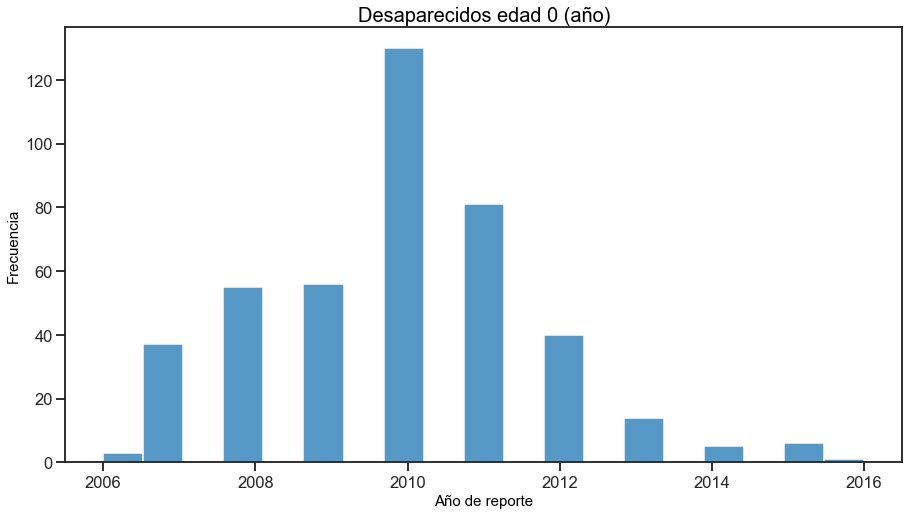

In [30]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frecuencia',fontdict=font2)
plt.xlabel('Año de reporte',fontdict=font2)
plt.title('Desaparecidos edad 0 (año)', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 0.0 )].year_reporte)
plt.show()

## Observaciones agregadas después de revisar Chihuahua

In [31]:
sinaloa[(sinaloa["edad"] == 0.0)].posible_causa_desaparicion.value_counts()

privacion_de_la_libertad                                                                                                                                                                                                                       50
no_especificado                                                                                                                                                                                                                                50
privacion_de_la_libertad_personal                                                                                                                                                                                                              13
desconocida                                                                                                                                                                                                                                     8
lo_privaron_a_fuerza_de_su_liber

In [32]:
sinaloa[(sinaloa["edad"] == 0.0)][["edad","fecha_de_nacimiento","fecha_reporte","posible_causa_desaparicion"]].T

,426,439,446,452,453,458,459,477,640,654,...,45752,45806,49030,58324,67685,67691,70480,71586,71714,93400
edad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fecha_de_nacimiento,_,_,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,_,01/01/00_0:00,01/01/00_0:00,_,_,...,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/15_0:00,23/06/14_0:00,01/01/70_0:00,01/01/54_0:00,01/04/15_0:00,01/01/15_0:00,01/01/15_0:00
fecha_reporte,2010-05-17 12:00:00,2010-06-22 12:00:00,2010-07-24 12:00:00,2010-08-24 12:00:00,2010-10-09 12:00:00,2010-09-20 12:00:00,2010-10-30 12:00:00,2010-09-11 02:30:00,2010-12-01 12:00:00,2010-04-13 12:00:00,...,2013-02-20 12:10:00,2012-04-07 09:20:00,2014-01-03 06:06:00,2015-12-05 03:23:00,2015-08-06 01:16:00,2015-06-13 09:54:00,2015-07-23 04:33:00,2016-01-26 07:10:00,2015-05-14 10:33:00,2015-05-14 10:33:00
posible_causa_desaparicion,NaN,NaN,privacion_de_la_libertad,privacion_de_la_libertad,desconocida,NaN,equivocación,privacion_de_la_libertad,NaN,NaN,...,NaN,NaN,se_fue_por_que_estaba_enfadada,se_desconoce,su_mama_se_la_llevo_con_ella_a_vivir_con_su_pa...,lo_confundieron_y_lo_dejaron_libre,NaN,se_la_llevo_su_menor_madre_de_la_casa_en_la_qu...,NaN,NaN


## Fin de las observaciones extras

## exploración por mujeres de 15 años

In [33]:
len(sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")])

252

de los 335 de 15 años, 252 son mujeres, esto es: el 3.23% de los desaparecidos en Sinaloa son mujeres de 15 años de edad, si lo que vi en noticias es cierto, necontes la mayoría tendría que estar en vivas o no localizadas

In [34]:
sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 222
aun_sin_localizar     30
Name: vivo_o_muerto, dtype: int64

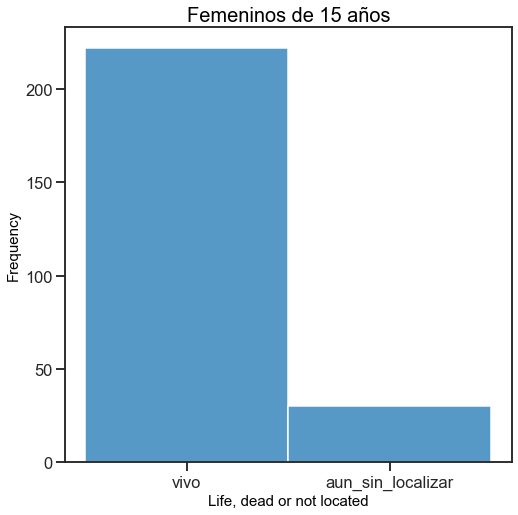

In [35]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Life, dead or not located',fontdict=font2)
plt.title('Femeninos de 15 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto)
plt.show()

Coincide, la mayoría son localizadas vivas

# sinaloa.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True) #just re-naming a column
sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")].estado_localizado.value_counts()

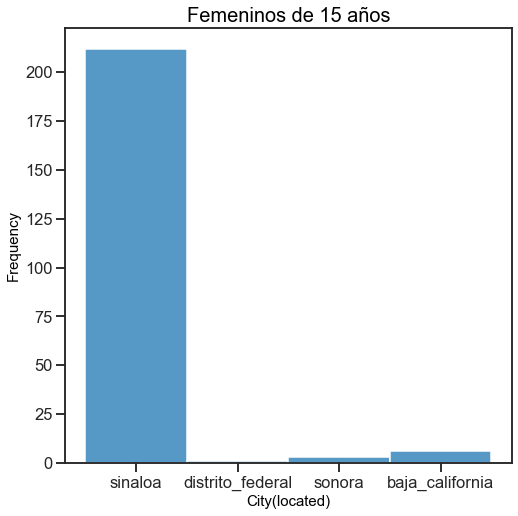

In [36]:
plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Femeninos de 15 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")].estado_localizado)
plt.show()

## Regresemos al exploratorio original

In [37]:
sinaloa[(sinaloa["edad"] == 15 )].vivo_o_muerto.value_counts()

vivo                 279
aun_sin_localizar     52
muerto                 4
Name: vivo_o_muerto, dtype: int64

In [38]:
sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 222
aun_sin_localizar     30
Name: vivo_o_muerto, dtype: int64

In [39]:
sinaloa[(sinaloa["edad"] == 15 ) & (sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 57
aun_sin_localizar    22
muerto                4
Name: vivo_o_muerto, dtype: int64

### 16 años

In [40]:
sinaloa[(sinaloa["edad"] == 16 )].vivo_o_muerto.value_counts()

vivo                 254
aun_sin_localizar     53
muerto                13
Name: vivo_o_muerto, dtype: int64

In [41]:
sinaloa[(sinaloa["edad"] == 16 )].sexo.value_counts()

femenino     213
masculino    107
Name: sexo, dtype: int64

In [42]:
sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "femenino")].estado_localizado.value_counts()

sinaloa             173
no_especificado       1
durango               1
distrito_federal      1
guerrero              1
colima                1
baja_california       1
nayarit               1
jalisco               1
Name: estado_localizado, dtype: int64

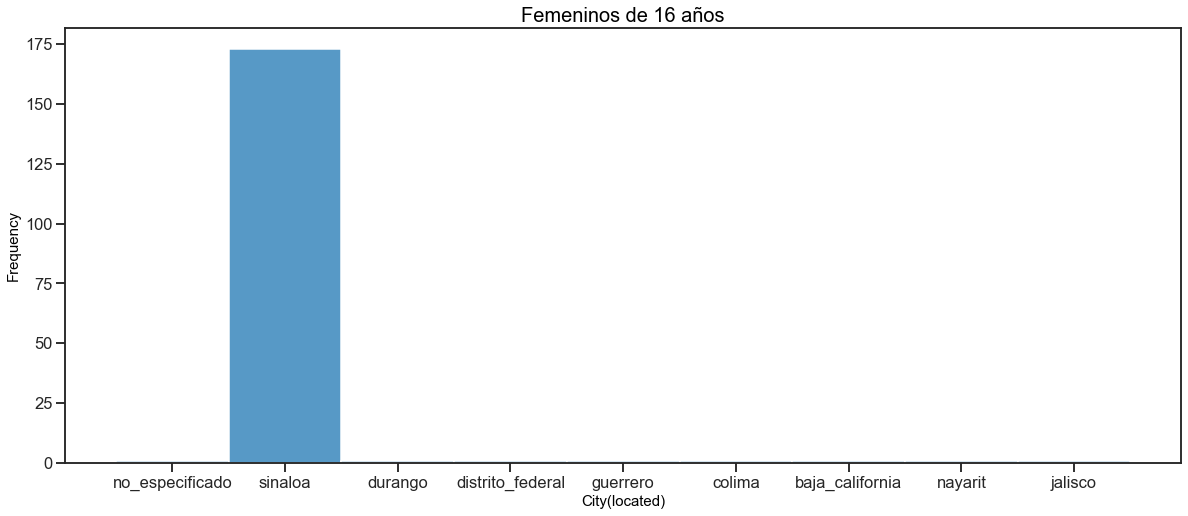

In [43]:
plt.figure(figsize=(20, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Femeninos de 16 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "femenino")].estado_localizado)
plt.show()

In [44]:
sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "masculino")].estado_localizado.value_counts()

sinaloa            81
no_especificado     3
sonora              1
baja_california     1
veracruz            1
durango             1
Name: estado_localizado, dtype: int64

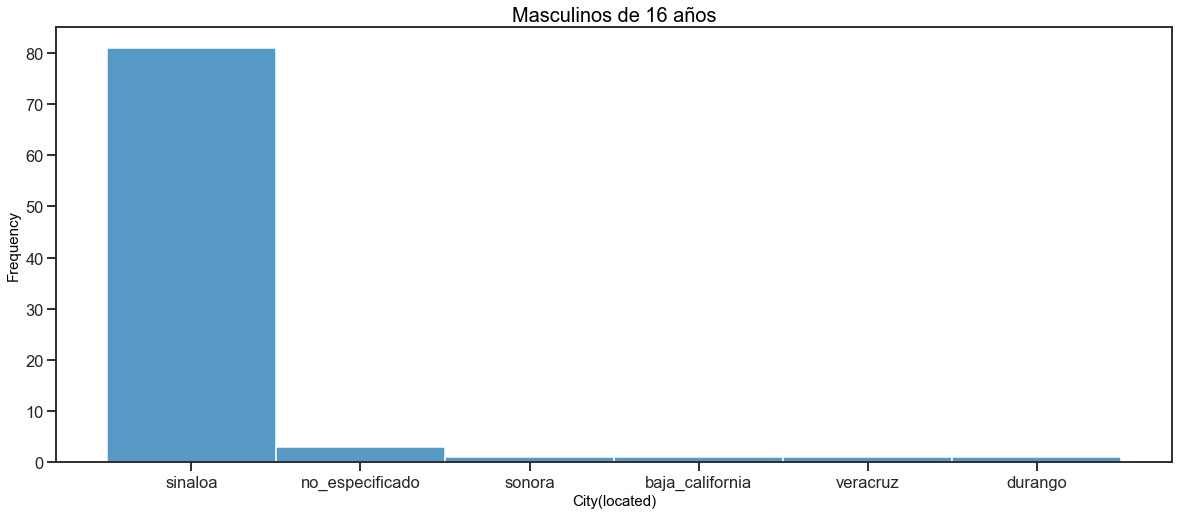

In [45]:
plt.figure(figsize=(20, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Masculinos de 16 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "masculino")].estado_localizado)
plt.show()

In [46]:
sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "masculino") & (sinaloa["estado_localizado"] == "sinaloa")].vivo_o_muerto.value_counts()

vivo      69
muerto    12
Name: vivo_o_muerto, dtype: int64

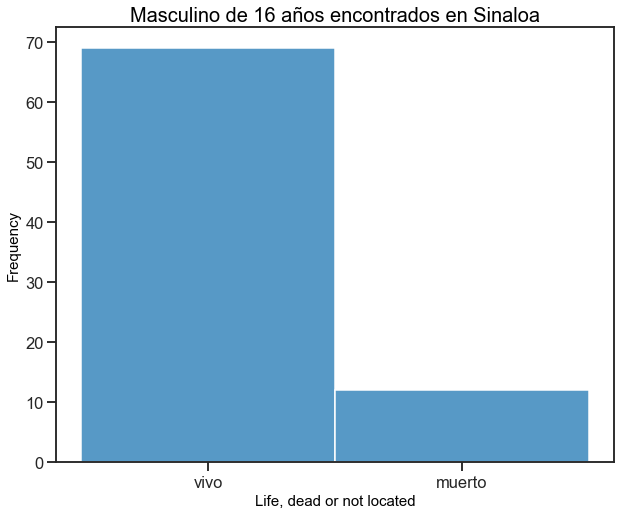

In [47]:
plt.figure(figsize=(10, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Life, dead or not located',fontdict=font2)
plt.title('Masculino de 16 años encontrados en Sinaloa', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "masculino") & (sinaloa["estado_localizado"] == "sinaloa")].vivo_o_muerto)
plt.show()

In [48]:
sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 180
aun_sin_localizar     32
muerto                 1
Name: vivo_o_muerto, dtype: int64

In [49]:
sinaloa[(sinaloa["edad"] == 16 ) & (sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 74
aun_sin_localizar    21
muerto               12
Name: vivo_o_muerto, dtype: int64

### 17 años

In [50]:
sinaloa[(sinaloa["edad"] == 17 )].vivo_o_muerto.value_counts()

vivo                 206
aun_sin_localizar     75
muerto                15
Name: vivo_o_muerto, dtype: int64

In [51]:
sinaloa[(sinaloa["edad"] == 17 )].sexo.value_counts()

femenino     160
masculino    136
Name: sexo, dtype: int64

In [52]:
sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 67
aun_sin_localizar    55
muerto               14
Name: vivo_o_muerto, dtype: int64

In [53]:
sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 139
aun_sin_localizar     20
muerto                 1
Name: vivo_o_muerto, dtype: int64

In [54]:
sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "femenino")].estado_localizado.value_counts()

sinaloa             139
estado_de_mexico      1
no_especificado       1
Name: estado_localizado, dtype: int64

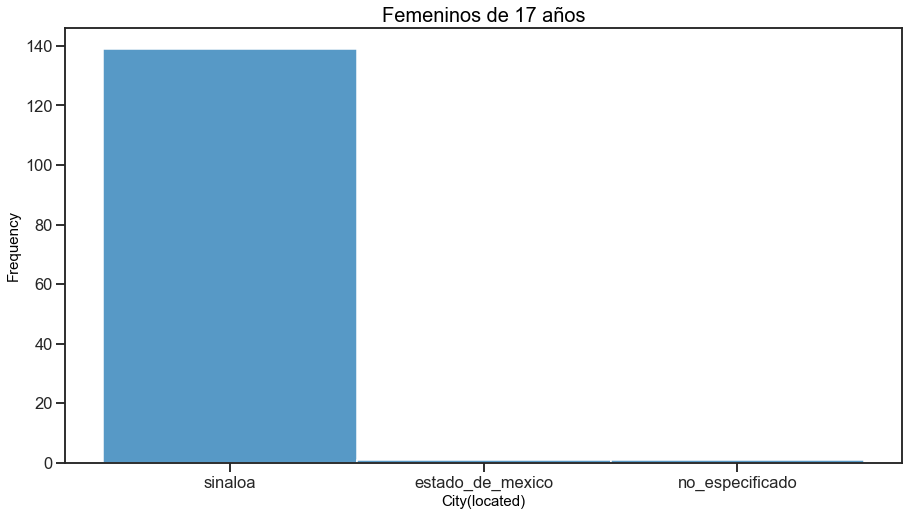

In [55]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Femeninos de 17 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "femenino")].estado_localizado)
plt.show()

In [56]:
sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "masculino")].estado_localizado.value_counts()

sinaloa            77
no_especificado     5
baja_california     4
Name: estado_localizado, dtype: int64

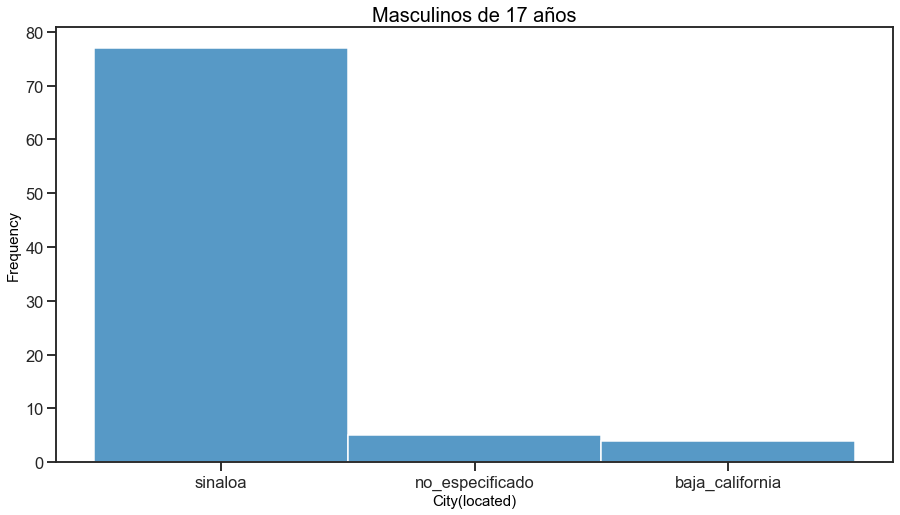

In [57]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Masculinos de 17 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 17 ) & (sinaloa["sexo"] == "masculino")].estado_localizado)
plt.show()

### 18 años

In [58]:
sinaloa[(sinaloa["edad"] == 18 )].vivo_o_muerto.value_counts()

vivo                 149
aun_sin_localizar     90
muerto                25
Name: vivo_o_muerto, dtype: int64

In [59]:
sinaloa[(sinaloa["edad"] == 18)].sexo.value_counts()

masculino    166
femenino      98
Name: sexo, dtype: int64

In [60]:
sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    77
vivo                 65
muerto               24
Name: vivo_o_muerto, dtype: int64

In [61]:
sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 84
aun_sin_localizar    13
muerto                1
Name: vivo_o_muerto, dtype: int64

In [62]:
sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "femenino")].estado_localizado.value_counts()

sinaloa            83
no_especificado     1
durango             1
Name: estado_localizado, dtype: int64

In [63]:
sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "masculino")].estado_localizado.value_counts()

sinaloa            87
no_especificado     6
nayarit             1
baja_california     1
Name: estado_localizado, dtype: int64

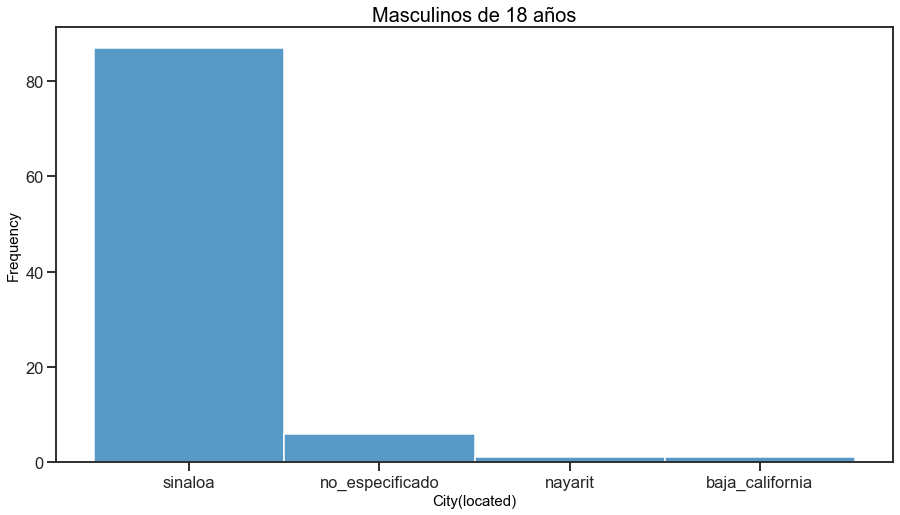

In [64]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Masculinos de 18 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "masculino")].estado_localizado)
plt.show()

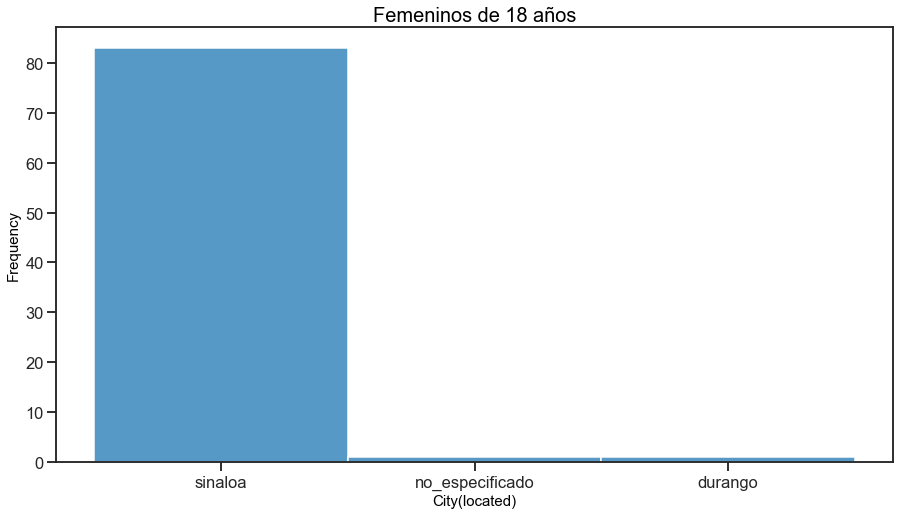

In [65]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Femeninos de 18 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 18 ) & (sinaloa["sexo"] == "femenino")].estado_localizado)
plt.show()

##  las 4 edades con más desaparecimientos

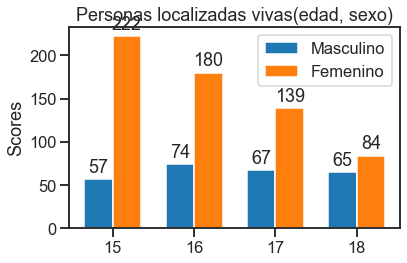

In [66]:
labels = ['15', '16', '17', '18']
men_means = [ 57, 74, 67, 65]
women_means = [222, 180, 139, 84]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Personas localizadas vivas(edad, sexo)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

ToDo: mismo plor, pero para No localizadas y para Localizadas muertas

## 21 años,aparte ya que los datos cambian aquí

In [67]:
sinaloa[(sinaloa["edad"] == 21 )].vivo_o_muerto.value_counts()

aun_sin_localizar    113
vivo                 106
muerto                33
Name: vivo_o_muerto, dtype: int64

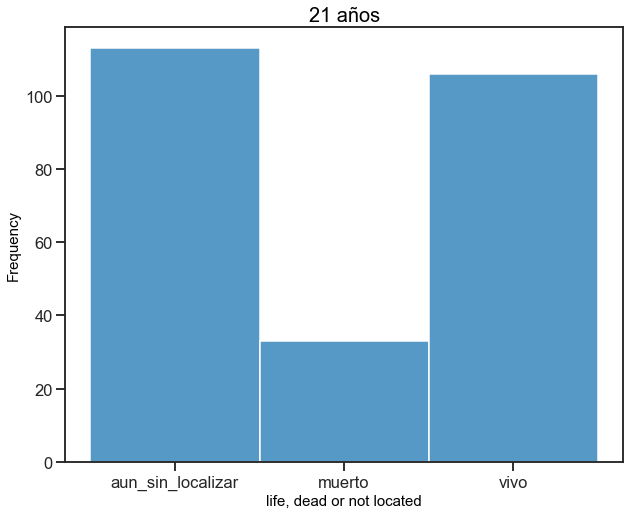

In [68]:
plt.figure(figsize=(10, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('life, dead or not located',fontdict=font2)
plt.title('21 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 21 )].vivo_o_muerto)
plt.show()

In [69]:
sinaloa[(sinaloa["edad"] == 21 )].sexo.value_counts()

masculino    196
femenino      56
Name: sexo, dtype: int64

In [70]:
sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    97
vivo                 66
muerto               33
Name: vivo_o_muerto, dtype: int64

In [71]:
sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 40
aun_sin_localizar    16
Name: vivo_o_muerto, dtype: int64

In [72]:
sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "femenino")].estado_localizado.value_counts()

sinaloa            38
no_especificado     1
jalisco             1
baja_california     1
Name: estado_localizado, dtype: int64

In [73]:
sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "masculino")].estado_localizado.value_counts()

sinaloa            96
no_especificado     7
durango             2
jalisco             1
Name: estado_localizado, dtype: int64

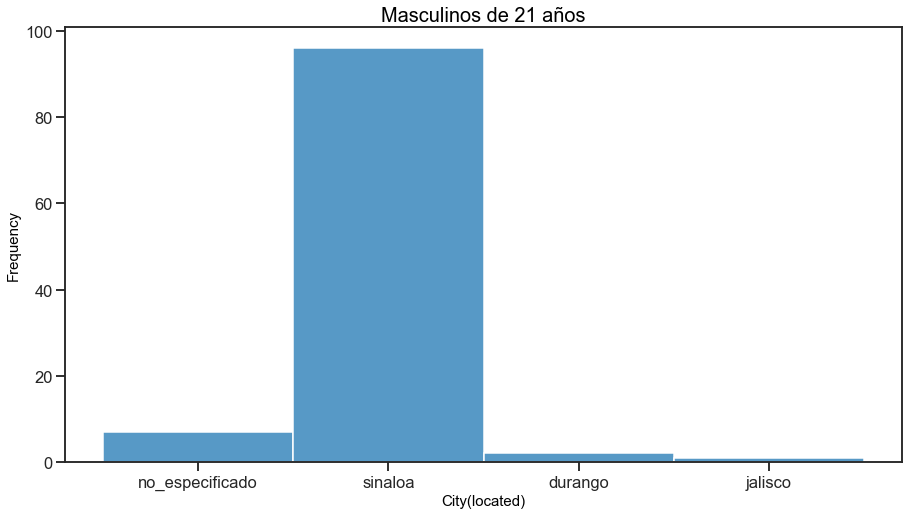

In [74]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Masculinos de 21 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "masculino")].estado_localizado)
plt.show()

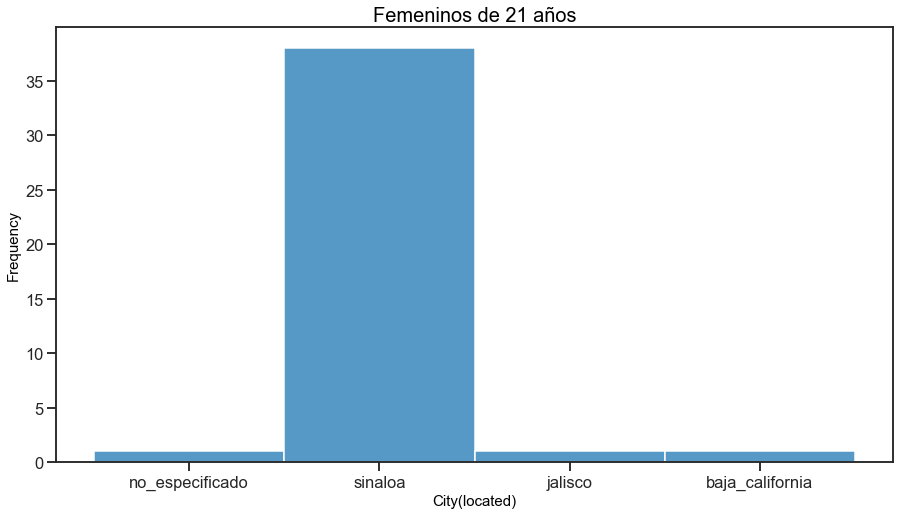

In [75]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('City(located)',fontdict=font2)
plt.title('Femeninos de 21 años', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["edad"] == 21 ) & (sinaloa["sexo"] == "femenino")].estado_localizado)
plt.show()

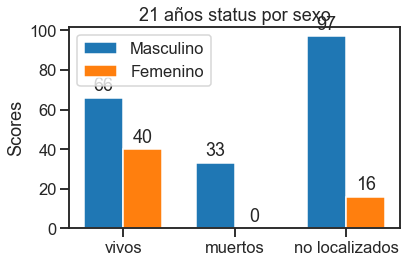

In [76]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 66,33,97]
women_means = [40, 0, 16]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('21 años status por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Fechas

## Fecha de reporte vs fecha de evento en edades 

In [77]:
sinaloa["dias_de_busqueda_reporte"] = sinaloa["fecha_de_localizacion"] - sinaloa["fecha_reporte"]
sinaloa["dias_de_busqueda_reporte"].head()

411                 NaT
421   674 days 00:00:00
422    93 days 16:00:00
425     0 days 21:00:00
426                 NaT
Name: dias_de_busqueda_reporte, dtype: timedelta64[ns]

In [78]:
sinaloa["dias_de_busqueda_evento"] = sinaloa["fecha_de_localizacion"] - sinaloa["fecha_evento"]
sinaloa["dias_de_busqueda_evento"].head()

411                 NaT
421   675 days 05:00:00
422    98 days 20:00:00
425     1 days 21:00:00
426                 NaT
Name: dias_de_busqueda_evento, dtype: timedelta64[ns]

In [79]:
sinaloa.dias_de_busqueda_reporte.describe()

count                              6247
mean     -1466 days +17:08:06.961901680
std        2695 days 16:27:50.306161536
min                -6912 days +06:32:00
25%                 -303 days +00:00:00
50%                     0 days 02:00:00
75%                    30 days 07:13:00
max                  2273 days 00:16:00
Name: dias_de_busqueda_reporte, dtype: object

In [80]:
sinaloa.dias_de_busqueda_reporte.value_counts()

20 days 00:00:00        197
0 days 00:00:00          71
-1 days +23:00:00        30
79 days 00:00:00         28
138 days 00:00:00        23
                       ... 
-114 days +17:53:00       1
59 days 09:42:00          1
3 days 19:22:00           1
2 days 06:14:00           1
-6695 days +23:20:00      1
Name: dias_de_busqueda_reporte, Length: 4729, dtype: int64

In [81]:
sinaloa.dias_de_busqueda_evento.describe()

count                              6247
mean     -1431 days +22:48:56.634544576
std        2670 days 02:46:29.652398080
min                -6912 days +00:00:00
25%                 -291 days +15:00:00
50%                     1 days 04:00:00
75%                    48 days 06:05:00
max                  8282 days 04:00:00
Name: dias_de_busqueda_evento, dtype: object

In [82]:
sinaloa.dias_de_busqueda_evento.value_counts()

0 days 00:00:00         55
0 days 01:00:00         22
2 days 00:00:00         21
-1 days +23:00:00       20
30 days 15:00:00        19
                        ..
-154 days +21:37:33      1
-9 days +00:18:24        1
22 days 06:41:28         1
30 days 22:55:00         1
-6691 days +06:00:00     1
Name: dias_de_busqueda_evento, Length: 4704, dtype: int64

## Años

In [83]:
sinaloa.year_reporte.value_counts()

2013    1057
2017     966
2016     963
2014     909
2015     891
2012     842
2011     615
2010     511
2008     308
2018     263
2009     251
2007     201
2006      21
Name: year_reporte, dtype: int64

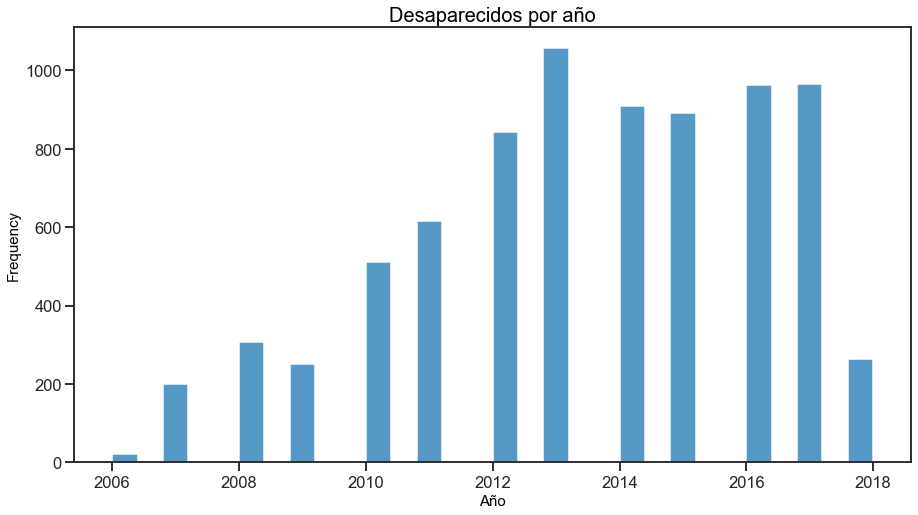

In [84]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Año',fontdict=font2)
plt.title('Desaparecidos por año', fontdict=font1)

sns.histplot(sinaloa.year_reporte)
plt.show()

In [85]:
sinaloa[(sinaloa["vivo_o_muerto"] == "vivo" )].year_reporte.value_counts()

2013    611
2012    549
2014    503
2015    475
2016    406
2011    347
2010    260
2017    214
2008    200
2009    178
2007    134
2018     18
2006     17
Name: year_reporte, dtype: int64

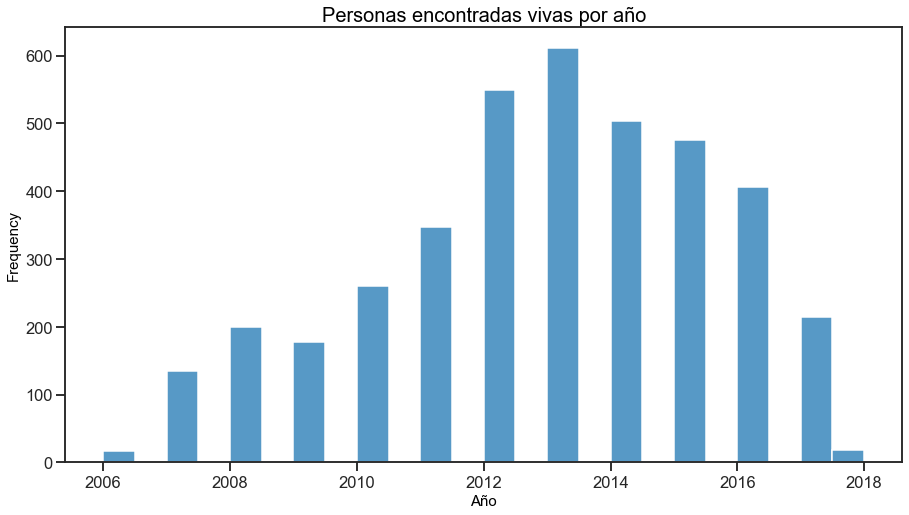

In [86]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Año',fontdict=font2)
plt.title('Personas encontradas vivas por año', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "vivo" )].year_reporte)
plt.show()

In [87]:
sinaloa[(sinaloa["vivo_o_muerto"] == "muerto" )].year_reporte.value_counts()

2013    152
2016    116
2017    111
2012    100
2014     90
2011     79
2010     65
2015     50
2008     37
2009     29
2007     20
2018      4
2006      2
Name: year_reporte, dtype: int64

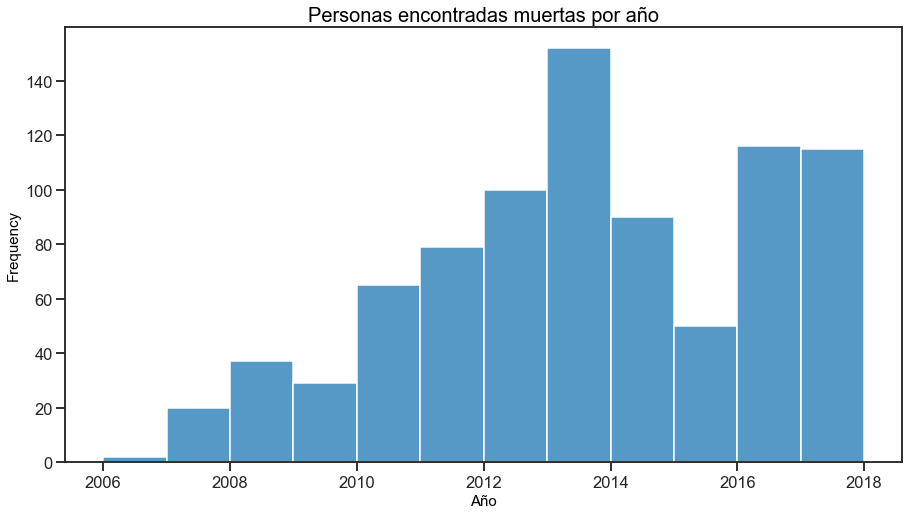

In [88]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Año',fontdict=font2)
plt.title('Personas encontradas muertas por año', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "muerto" )].year_reporte)
plt.show()

In [89]:
sinaloa[(sinaloa["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte.value_counts()

2017    641
2016    441
2015    366
2014    316
2013    294
2018    241
2012    193
2011    189
2010    186
2008     71
2007     47
2009     44
2006      2
Name: year_reporte, dtype: int64

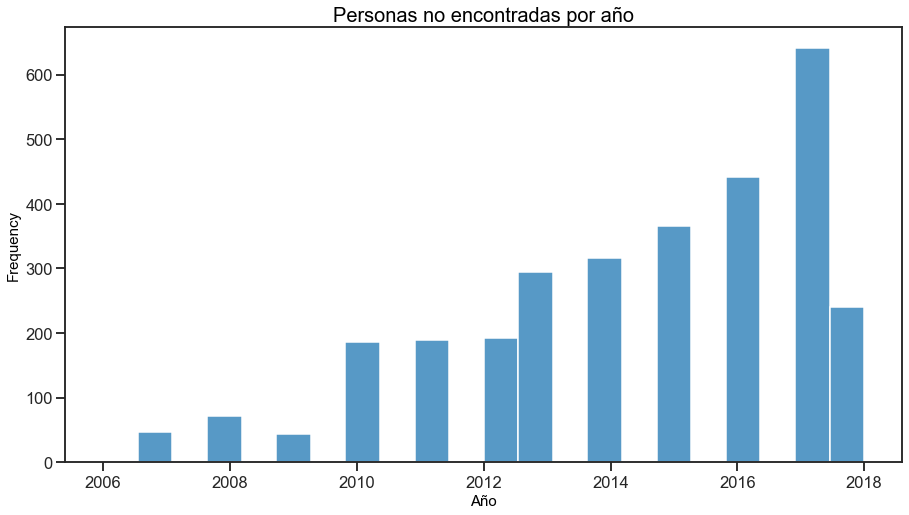

In [90]:
plt.figure(figsize=(15, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Año',fontdict=font2)
plt.title('Personas no encontradas por año', fontdict=font1)

sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte)
plt.show()

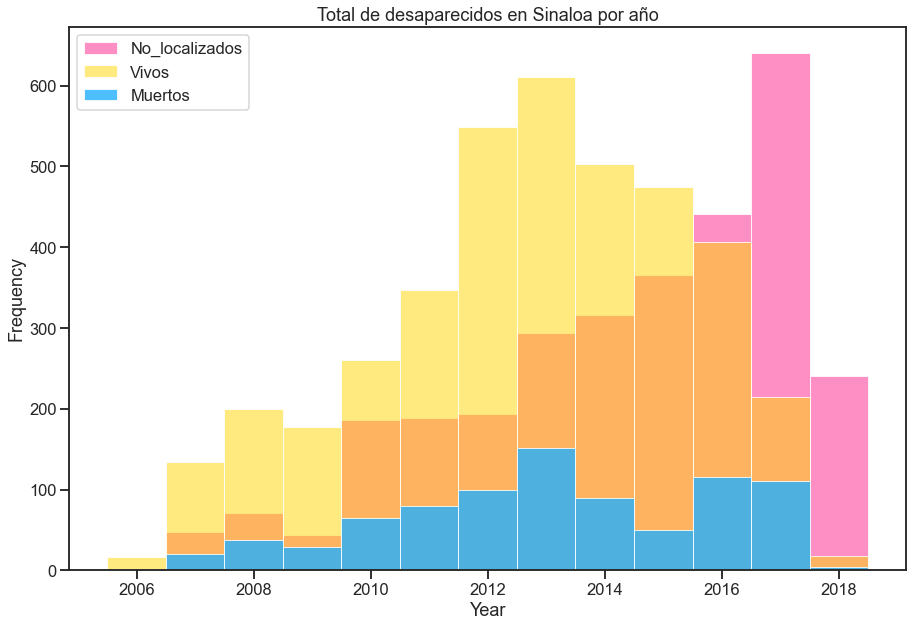

In [91]:
plt.figure(figsize=(15,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "vivo" )].year_reporte, label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(sinaloa[(sinaloa["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Total de desaparecidos en Sinaloa por año')

plt.show()